## Part 2 

### 0. First，we need to generate A and b

In [44]:
import numpy as np

A = np.zeros((1000, 1000))
for i in range(A.shape[0]):
    A[i][i] = i+1
for j in range(A.shape[0]-1):
    A[j][j+1] = 1
for j in range(1, A.shape[0]):
    A[j][j-1] = 1

b = np.ones(1000)

### 1. Write a code that performs 1000 (or more) steps of the steepest descent to approximately solve Ax = b.

In [45]:
def SD(x0, A, b, MAX_ITER=1000):
    his_r = []
    r = b - np.dot(A, x0)
    x = x0
    for i in range(MAX_ITER):
        his_r.append(np.dot(r.transpose(), r))
        
        tmp = np.dot(A, r)
        alpha = np.dot(r.transpose(), r)/np.dot(r.transpose(), tmp)
        x = x + alpha*r
        r = r - alpha*tmp
    return np.sqrt(his_r)

### 2. Write a code that performs 1000 steps of the CG to approximately solve Ax = b.

In [46]:
def CG(x0, A, b, MAX_ITER=1000):
    his_r = []
    his_ar = []
    r = b - np.dot(A, x0)
    x = x0
    p = r
    for i in range(MAX_ITER):
        his_r.append(np.dot(r.transpose(), r))
        r_tmp = b - np.dot(A, x)
        his_ar.append(np.dot(r_tmp.transpose(), r_tmp))
        
        tmp = np.dot(A, p)
        alpha = np.dot(p.transpose(), r)/np.dot(p.transpose(), tmp)
        x = x + alpha*p
        r = r - alpha*tmp
        beta = np.dot(tmp.transpose(), r)/np.dot(tmp.transpose(), p)
        p = r - beta*p
    return (np.sqrt(his_r), np.sqrt(his_ar))

### 3. Produce a plot with four curves on it

The computed residual norms and the actual residual norms for CG.

In [47]:
computed_norm, actual_norm = CG(np.ones(1000), A, b)

The residual norms for steepest descent.

In [48]:
residual_norm = SD(np.ones(1000), A, b)

The estimate

In [49]:
from numpy import linalg as LA
K = LA.cond(A)
tmp = (np.sqrt(K)-1)/(np.sqrt(K)+1)
estimate = [(2*np.power(tmp, i)) for i in range(1000)]

The plot with the four curves

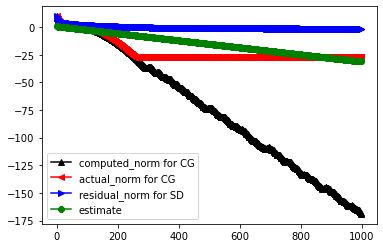

In [50]:
import matplotlib.pyplot as plt
index = np.arange(1000)
plt.plot(index, np.log(computed_norm), color='black', marker='^')
plt.plot(index, np.log(actual_norm), color='red', marker='<')
plt.plot(index, np.log(residual_norm), color='blue', marker='>')
plt.plot(index, np.log(estimate), color='green', marker='8')
plt.legend(['computed_norm for CG', 'actual_norm for CG', 'residual_norm for SD', 'estimate'], loc='lower left')
plt.show()

### 4. Comment on your results.

#### a. CG converges much more faster than SD. From this graph, we can see that CG gets a very good solution around step 240.
#### b. In textbook page155 Theorem 4.12, we can see rk/r0 is bounded by the estimate. So as the estimate becomes smaller, the upper bound of rk becomes smaller. This means convergence. I showed Elham Pilvar where we can find the theorem.

#### c. As for the difference between computed norm and actual norm for CG, I think it is caused by the machine precision. The true residual and the computed residual is the same at the begining and the computed residual becomes so small that some perturbations are introduced to rk. Later we use rk to do the iteration and the perturbation can accumulate.  

#### d. I try to quantify the error and then Elham Pilvar told me she saw a similar paper named “On the Behavior of the Residuals in Conjugate Gradient Method , Teruyoshi Washizawa”. From this paper, I gain a better understanding of this phenomenon. In the related work, many researchers have studied the problem. In this paper the author showed that the true and the recursive residual has the 2-norm almost monotonicity in finite arithmetic, respectively, and the author studied lower bounds of error and residual in finite arithmetic.